In [2]:
import pandas as pd

# Hapus id
df = pd.read_csv('dataset/data.csv', sep=';')

df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

print("Isi kolom diagnosis sebelum diubah:")
print(df['diagnosis'].iloc[19:26])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\nIsi kolom diagnosis setelah diubah (Harus 1 atau 0):")
print(df['diagnosis'].iloc[19:26])

df.to_csv('dataset/dataset_clean.csv', index=False)

Isi kolom diagnosis sebelum diubah:
19    B
20    B
21    B
22    M
23    M
24    M
25    M
Name: diagnosis, dtype: object

Isi kolom diagnosis setelah diubah (Harus 1 atau 0):
19    0
20    0
21    0
22    1
23    1
24    1
25    1
Name: diagnosis, dtype: int64


In [3]:
# Memisahkan x dan y
X = df.drop('diagnosis', axis=1)

y = df['diagnosis']

print("Ukuran X (Baris, Kolom):", X.shape)
print("Ukuran y (Baris,):", y.shape)

Ukuran X (Baris, Kolom): (569, 30)
Ukuran y (Baris,): (569,)


In [4]:
# Memisahkan dataset dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil pembagian
print("Total Data Asli:", len(X))
print("---------------------------")
print("Jumlah Data Latih (80%):", len(X_train))
print("Jumlah Data Uji (20%):", len(X_test))

Total Data Asli: 569
---------------------------
Jumlah Data Latih (80%): 455
Jumlah Data Uji (20%): 114


In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Data Sebelum Scaling (Area):", X_train.iloc[0]['area_mean'])
print("Data Setelah Scaling (Area):", X_train_scaled[0][3]) 


Data Sebelum Scaling (Area): 250.5
Data Setelah Scaling (Area): -1.1391178966662039


In [6]:
# Gabungkan kembali X dan y agar jadi satu tabel utuh
df_latih_final = pd.DataFrame(X_train_scaled, columns=X.columns)

df_latih_final['diagnosis'] = y_train.reset_index(drop=True)

df_latih_final.to_csv('dataset/data_latih_scaled.csv', index=False)

✅ Akurasi KNN: 96.49%


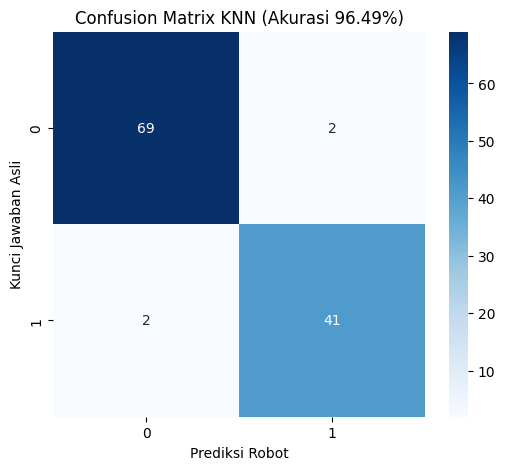

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Training KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn) * 100
print(f"✅ Akurasi KNN: {acc_knn:.2f}%")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix KNN (Akurasi {acc_knn:.2f}%)')
plt.xlabel('Prediksi Robot')
plt.ylabel('Kunci Jawaban Asli')
plt.show()

✅ Akurasi Decision Tree: 94.74%


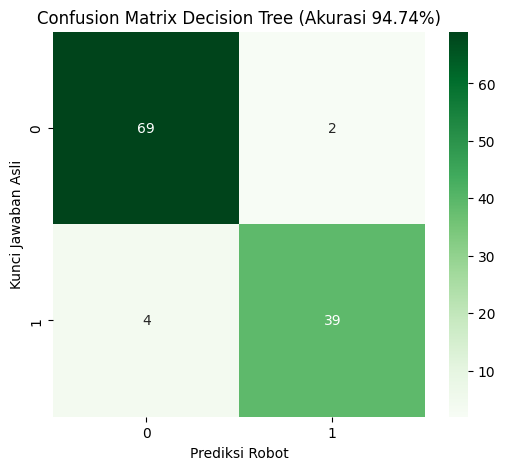

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 1. Training Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

acc_dt = accuracy_score(y_test, y_pred_dt) * 100
print(f"✅ Akurasi Decision Tree: {acc_dt:.2f}%")

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title(f'Confusion Matrix Decision Tree (Akurasi {acc_dt:.2f}%)')
plt.xlabel('Prediksi Robot')
plt.ylabel('Kunci Jawaban Asli')
plt.show()

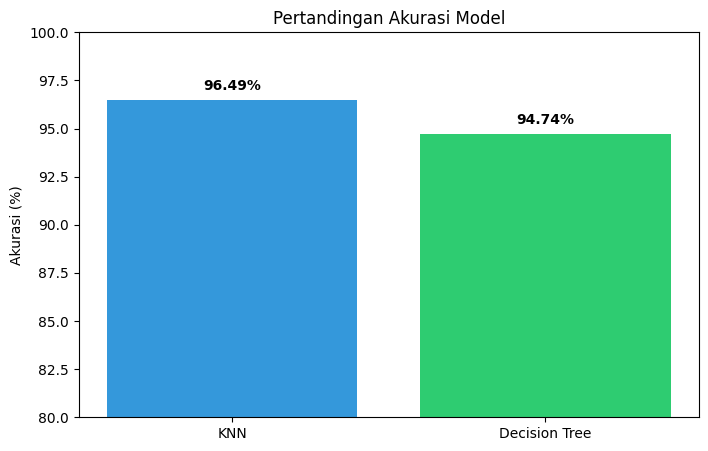

In [9]:
# Grafik perbandingan
models = ['KNN', 'Decision Tree']
scores = [acc_knn, acc_dt]
colors = ['#3498db', '#2ecc71'] 

plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=colors)

plt.ylim(80, 100) 
plt.ylabel('Akurasi (%)')
plt.title('Pertandingan Akurasi Model')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.2f}%', ha='center', fontweight='bold')

plt.show()

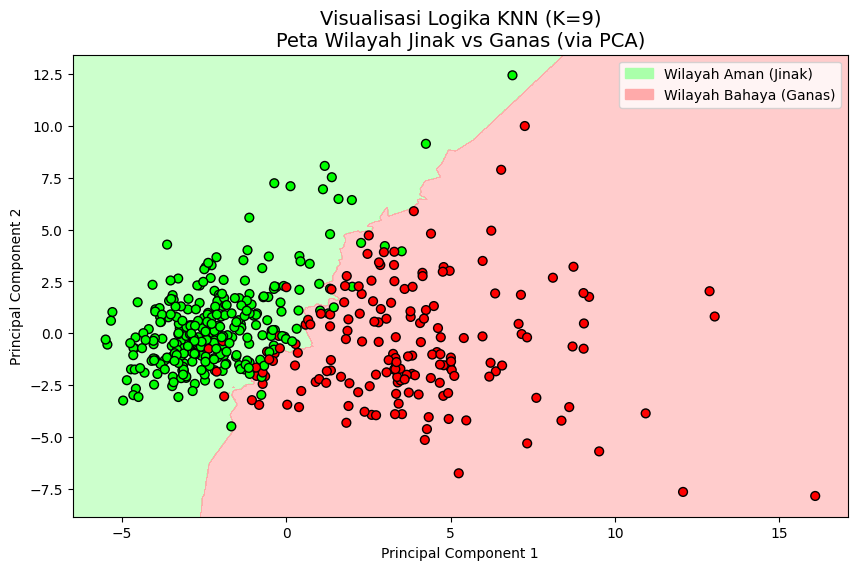

In [10]:
# Visualisasi logika knn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
X_visual = pca.fit_transform(X_train_scaled)

knn_visual = KNeighborsClassifier(n_neighbors=9)
knn_visual.fit(X_visual, y_train)

h = .02  
x_min, x_max = X_visual[:, 0].min() - 1, X_visual[:, 0].max() + 1
y_min, y_max = X_visual[:, 1].min() - 1, X_visual[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_visual.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

cmap_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#00FF00', '#FF0000'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

scatter = plt.scatter(X_visual[:, 0], X_visual[:, 1], c=y_train, 
                      cmap=cmap_bold, edgecolor='k', s=40)

plt.title(f'Visualisasi Logika KNN (K=9)\nPeta Wilayah Jinak vs Ganas (via PCA)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#FFAAAA', label='Wilayah Bahaya (Ganas)')
green_patch = mpatches.Patch(color='#AAFFAA', label='Wilayah Aman (Jinak)')
plt.legend(handles=[green_patch, red_patch], loc='upper right')

plt.show()

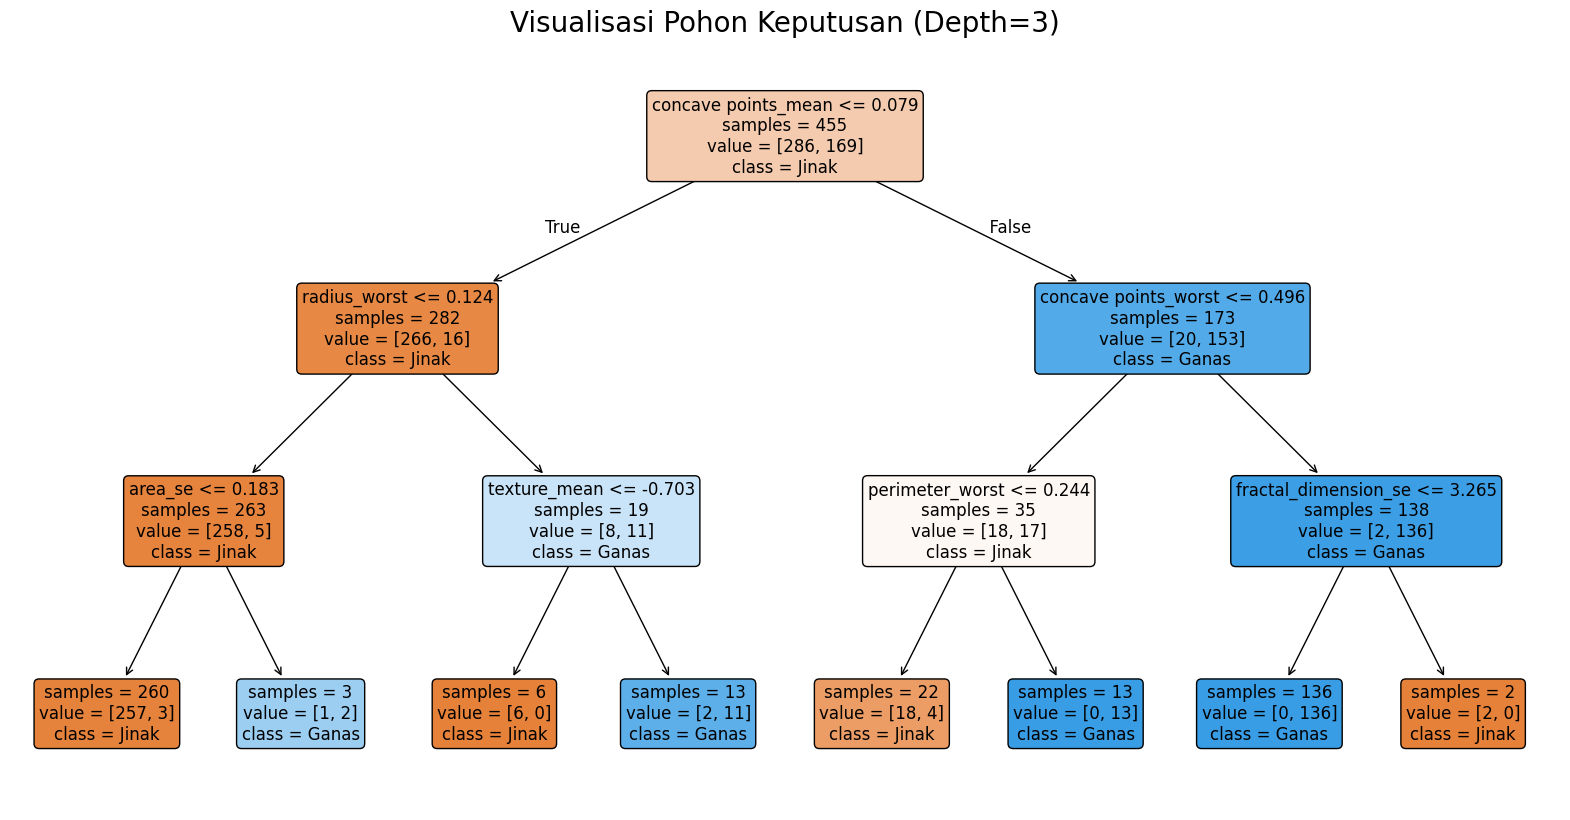

In [11]:
# Visualisasi Logika Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree 

dt_final = DecisionTreeClassifier(random_state=42, max_depth=3) 
dt_final.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))

plot_tree(dt_final, 
          max_depth=3,                 
          feature_names=X.columns,     
          class_names=['Jinak', 'Ganas'], 
          filled=True,                 
          rounded=True,                
          impurity=False,              
          fontsize=12)                 

plt.title("Visualisasi Pohon Keputusan (Depth=3)", fontsize=20)
plt.show()

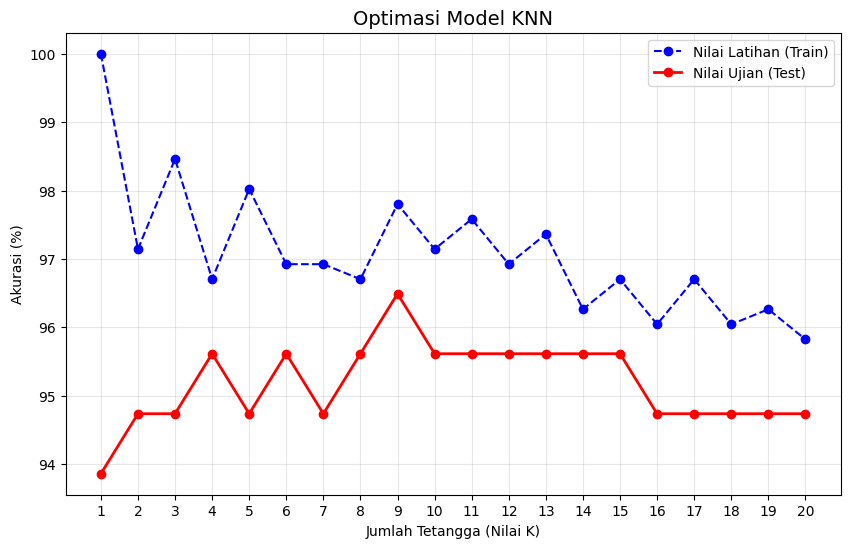

In [12]:
# Perbandingan data training dan test KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 21) 
train_scores = []      
test_scores = []       

# Loop model mencoba satu-satu
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(knn_temp.score(X_train_scaled, y_train) * 100)
    test_scores.append(knn_temp.score(X_test_scaled, y_test) * 100)

plt.figure(figsize=(10, 6))

plt.plot(k_range, train_scores, label='Nilai Latihan (Train)', 
         marker='o', linestyle='--', color='blue')

plt.plot(k_range, test_scores, label='Nilai Ujian (Test)', 
         marker='o', linewidth=2, color='red')

plt.title('Optimasi Model KNN', fontsize=14)
plt.xlabel('Jumlah Tetangga (Nilai K)')
plt.ylabel('Akurasi (%)')
plt.xticks(k_range) 
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

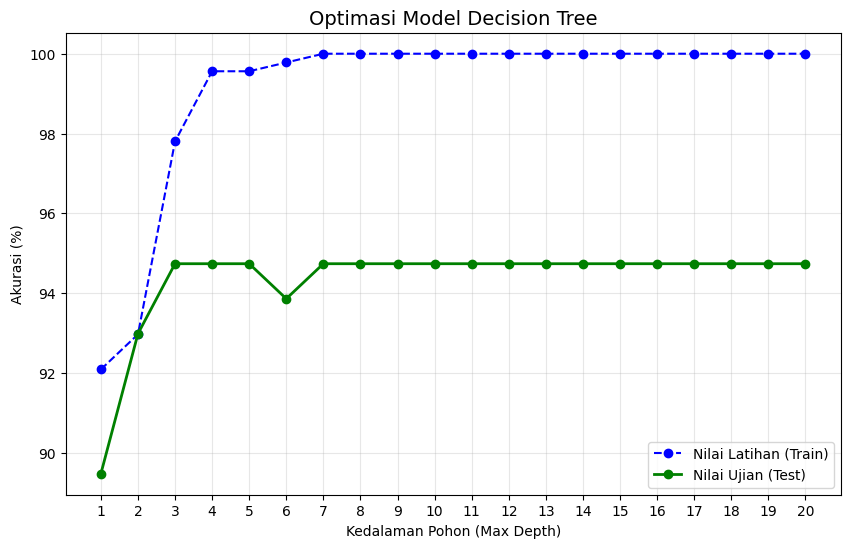

In [16]:
# Visualisasi Perbandingan data training dan test Decision Tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

depth_range = range(1, 21)
train_scores_dt = []      
test_scores_dt = []       

for d in depth_range:
    dt_temp = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_temp.fit(X_train_scaled, y_train)
    
    train_scores_dt.append(dt_temp.score(X_train_scaled, y_train) * 100)
    test_scores_dt.append(dt_temp.score(X_test_scaled, y_test) * 100)

plt.figure(figsize=(10, 6))

plt.plot(depth_range, train_scores_dt, label='Nilai Latihan (Train)', 
         marker='o', linestyle='--', color='blue')

plt.plot(depth_range, test_scores_dt, label='Nilai Ujian (Test)', 
         marker='o', linewidth=2, color='green')

plt.title('Optimasi Model Decision Tree', fontsize=14)
plt.xlabel('Kedalaman Pohon (Max Depth)')
plt.ylabel('Akurasi (%)')
plt.xticks(depth_range)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [14]:
# Laporan Performa Final Decision KNN
from sklearn.metrics import accuracy_score, classification_report

y_pred_final = knn.predict(X_test_scaled)

acc_final = accuracy_score(y_test, y_pred_final) * 100

print("="*50)
print(f"PERFORMA FINAL MODEL KNN")
print("="*50)
print(f"Akurasi Testing : {acc_final:.2f}%")
print("-" * 50)

print("\n LAPORAN DETIL METRIK MEDIS:")
print("-" * 50)
print(classification_report(y_test, y_pred_final, target_names=['Jinak (0)', 'Ganas (1)']))
print("="*50)

PERFORMA FINAL MODEL KNN
Akurasi Testing : 96.49%
--------------------------------------------------

 LAPORAN DETIL METRIK MEDIS:
--------------------------------------------------
              precision    recall  f1-score   support

   Jinak (0)       0.97      0.97      0.97        71
   Ganas (1)       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [15]:
# Laporan Performa Final Decision Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_final = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_final.fit(X_train_scaled, y_train)

y_pred_dt = dt_final.predict(X_test_scaled)

acc_dt = accuracy_score(y_test, y_pred_dt) * 100

print("\n" + "="*50)
print(f"PERFORMA FINAL MODEL Decision Tree")
print("="*50)
print(f"Akurasi Testing : {acc_dt:.2f}%")
print("-" * 50)

print("\n LAPORAN DETIL METRIK MEDIS:")
print("-" * 50)
print(classification_report(y_test, y_pred_dt, target_names=['Jinak (0)', 'Ganas (1)']))
print("="*50)


PERFORMA FINAL MODEL Decision Tree
Akurasi Testing : 94.74%
--------------------------------------------------

 LAPORAN DETIL METRIK MEDIS:
--------------------------------------------------
              precision    recall  f1-score   support

   Jinak (0)       0.95      0.97      0.96        71
   Ganas (1)       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

